In [ ]:
!pip install pandas-profiling==2.7.1

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd '/content/gdrive/MyDrive/LDS6_S7N_TranHoangBach/BaiTap/Chapter_2'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/LDS6_S7N_TranHoangBach/BaiTap/Chapter_2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pandas_profiling as pp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
df = pd.read_csv('data/location_rev.csv')
df

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0
...,...,...,...,...,...,...
995,46689.11,3.0,28278.48,961.0,3335.0,16.0
996,34826.87,4.0,27801.73,1914.0,2507.0,14.0
997,28618.06,3.0,35481.50,1294.0,1731.0,10.0
998,40226.41,4.0,29218.30,1932.0,4410.0,13.0


In [ ]:
profile = pp.ProfileReport(df)
profile

Output hidden; open in https://colab.research.google.com to view.

Các biến đều là biến Numeric
Các biên có hệ số tương quan cao với revenue là:
- Median_income
- Population_density
- Location_age

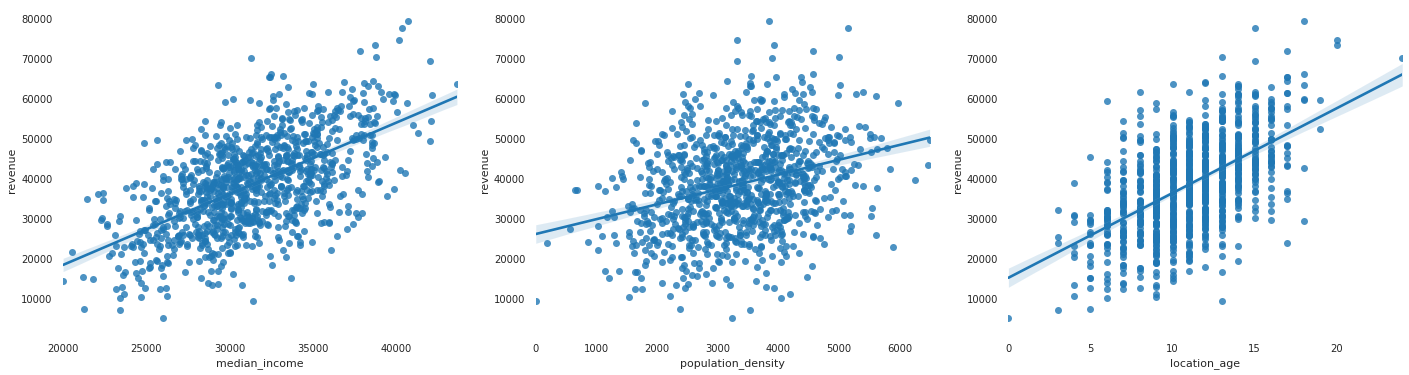

In [ ]:
plt.figure(figsize=(3*8, 6))
col_list = ['median_income', 'population_density', 'location_age']
for i, col in enumerate(col_list):
    plt.subplot(1,3,i+1)
    sb.regplot(x=col, y='revenue', data=df)
plt.show()

In [ ]:
X = df.drop('revenue', axis=1)
y = df['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(750, 5)
(750,)
(250, 5)
(250,)


Table score of Features


,Features,Score
1,median_income,446.435282
4,location_age,323.263674
3,population_density,76.766574
2,num_loyalty_members,25.779384
0,num_competitors,21.771653




Features selected: 
	 median_income
	 location_age


Mean of target value: 38,433
Median of target value: 38,323 

MSE_train : 48,115,353
RMSE_train: 6,937
MAE_train : 5,427
R2_train  : 0.6470 

MSE_test  : 52,164,822
RMSE_test : 7,223
MAE_test  : 5,841
R2_test   : 0.6127 



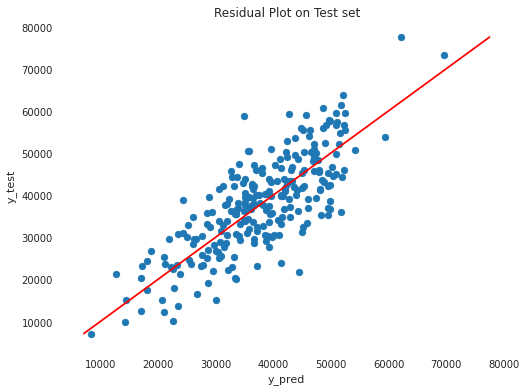

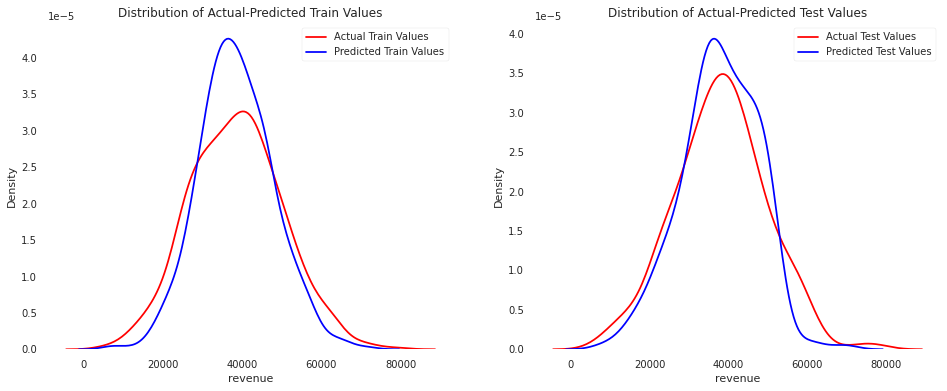

In [ ]:
lr_model = LinearRegression()
def print_regression_result(model, X_train, y_train, X_test, y_test):

    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print('Mean of target value: {:,.0f}'.format(np.mean(pd.concat([y_train, y_test]))))
    print('Median of target value: {:,.0f} \n'.format(np.median(pd.concat([y_train, y_test]))))

    print('MSE_train : {:,.0f}'.format(mean_squared_error(y_train, y_pred_train)))
    print('RMSE_train: {:,.0f}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
    print('MAE_train : {:,.0f}'.format(mean_absolute_error(y_train, y_pred_train)))
    print('R2_train  : {:.4f} \n'.format(r2_score(y_train, y_pred_train)))

    print('MSE_test  : {:,.0f}'.format(mean_squared_error(y_test, y_pred_test)))
    print('RMSE_test : {:,.0f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
    print('MAE_test  : {:,.0f}'.format(mean_absolute_error(y_test, y_pred_test)))
    print('R2_test   : {:.4f} \n'.format(r2_score(y_test, y_pred_test)))

def plot_resi_chart(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    min = np.min([y_test, y_pred_test])
    max = np.max([y_test, y_pred_test])

    plt.figure(figsize=(8,6))
    plt.scatter(y_pred_test, y_test)
    plt.plot([min, max], [min, max], 'k-', color='r')
    plt.xlabel('y_pred')
    plt.ylabel('y_test')
    plt.title('Residual Plot on Test set')
    plt.show()

def plot_dist_chart(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    plt.figure(figsize=(16, 6))
    plt.subplot(1,2,1)
    sb.kdeplot(y_train, color='r', label='Actual Train Values')
    sb.kdeplot(y_pred_train, color='b', label='Predicted Train Values')
    plt.legend()
    plt.title('Distribution of Actual-Predicted Train Values')
    
    plt.subplot(1,2,2)
    sb.kdeplot(y_test, color='r', label='Actual Test Values')
    sb.kdeplot(y_pred_test, color='b', label='Predicted Test Values')
    plt.legend()
    plt.title('Distribution of Actual-Predicted Test Values')
    plt.show()

def select_k_best_features(X_train, y_train, X_test, y_test, k_best_features):
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_regression

    best_k_features = SelectKBest(score_func=f_regression, k=k_best_features)
    best_k_features.fit(X_train, y_train)
    score = pd.Series(best_k_features.scores_)
    col = pd.Series(X_train.columns)
    result_best_features = pd.DataFrame({'Features': col, 'Score': score}).sort_values(by='Score', ascending=False)
    print('Table score of Features')
    display(result_best_features)
    print('\n')
    if k_best_features == 'all':
        print('All features will be selected for model.\n')
    else:
        print('Features selected: ')
        for features in result_best_features['Features'][:k_best_features]:
            print('\t', features)
        print('\n')
    X_train = best_k_features.transform(X_train)
    X_test = best_k_features.transform(X_test)
    return X_train, X_test

def run_regr_model(model, X_train, y_train, X_test, y_test, k_best_features='all', degree=1, resi_plot=True, dist_plot=True):

    X_train, X_test = select_k_best_features(X_train, y_train, X_test, y_test, k_best_features)

    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train = poly.fit_transform(X_train)
    X_test = poly.transform(X_test)

    print_regression_result(model, X_train, y_train, X_test, y_test)

    # Plot Residual Plot
    if resi_plot:
        plot_resi_chart(model, X_train, y_train, X_test, y_test)
    
    if dist_plot:
        plot_dist_chart(model, X_train, y_train, X_test, y_test)

run_regr_model(lr_model, X_train, y_train, X_test, y_test, degree=1, k_best_features=2)